In [47]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [48]:
category_df = pd.read_csv('업종분류.csv',engine='python')
code_list = category_df.iloc[7].values[1:]
name_list = category_df.iloc[8].values[1:]
cate_list = category_df.iloc[13].values[1:]
category_df = pd.DataFrame()
category_df['code'] = code_list
category_df['name'] = name_list
category_df['category'] = cate_list
category_df['category'] = category_df['category'].apply(lambda x: str(x).replace(' ',''))
fin_company_list = category_df[category_df['category'].str.contains('금융')]['code'].unique()

In [49]:
fundamental_df = pd.read_csv('fundamental data 1999_2015.csv',engine = 'python').drop([0,1,2,3,4,5,6,8,9,10,12]).copy()
stock_code = pd.DataFrame(fundamental_df.loc[7].values[1:].reshape(-1,1),columns= ['stock_code'])['stock_code'].unique()
temp_list=[]
for stock in stock_code:
    if stock in fin_company_list:
        pass
    else:
        temp_list.append(stock)
stock_code = temp_list
        
funda_code = pd.DataFrame(fundamental_df.loc[11].values[1:].reshape(-1,1),columns= ['funda_code'])['funda_code'].unique()
fundamental_df.columns = [fundamental_df.loc[7].values,fundamental_df.loc[11].values]
fundamental_df = fundamental_df.drop([7,11]).copy()
date_list = fundamental_df['Symbol']['Item Name'].unique()
fundamental_df = fundamental_df.set_index(fundamental_df['Symbol']['Item Name'].values)
fundamental_df = fundamental_df.drop('Symbol',axis = 1).copy()
fundamental_df.head()

A005930                                             \
                   총자산(천원)         총부채(천원) 시가총액 (티커-상장예정주식수 미포함)(백만원)   
1999-03-31  29,178,630,368  16,003,946,089                 12,649,438   
1999-06-30  29,178,630,368  16,003,946,089                 16,910,301   
1999-09-30  29,178,630,368  16,003,946,089                 29,395,965   
1999-12-31  29,178,630,368  16,003,946,089                 39,857,115   
2000-03-31  46,421,503,465  29,636,008,066                 50,353,737   

                                                                             \
                   총자본(천원) ROE(세전계속사업이익)(%)         매출액(천원)        매출원가(천원)   
1999-03-31  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-06-30  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-09-30  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
1999-12-31  13,174,684,279            45.56  32,087,714,365  21,476,416,255   
2000-03-31  16,785,495,399            57.42  43,527,806,399  27,638,606,865   

                                                          ...       A193250  \
           연구개발비(총액)(천원) 매출채권의감소(증가)(천원) 재고자산의감소(증가)(천원)  ... 연구개발비(총액)(천원)   
1999-03-31           NaN      79,917,153    -475,512,306  ...           NaN   
1999-06-30           NaN      79,917,153    -475,512,306  ...           NaN   
1999-09-30           NaN      79,917,153    -475,512,306  ...           NaN   
1999-12-31           NaN      79,917,153    -475,512,306  ...           NaN   
2000-03-31           NaN      11,480,652    -488,361,559  ...           NaN   

                                                                            \
           매출채권의감소(증가)(천원) 재고자산의감소(증가)(천원) 선급비용의감소(증가)(천원) (할인차금및이연수익)(천원)   
1999-03-31             NaN             NaN             NaN             NaN   
1999-06-30             NaN             NaN             NaN             NaN   
1999-09-30             NaN             NaN             NaN             NaN   
1999-12-31             NaN             NaN             NaN             NaN   
2000-03-31             NaN             NaN             NaN             NaN   

                                                  A014280               \
           매입채무의증가(감소)(천원) 미지급비용의 증가(감소)(천원)      총자산(천원)      총부채(천원)   
1999-03-31             NaN               NaN  145,413,404  132,434,657   
1999-06-30             NaN               NaN  145,413,404  132,434,657   
1999-09-30             NaN               NaN  145,413,404  132,434,657   
1999-12-31             NaN               NaN  145,413,404  132,434,657   
2000-03-31             NaN               NaN  128,663,786  120,161,649   

                                       
           시가총액 (티커-상장예정주식수 미포함)(백만원)  
1999-03-31                      3,200  
1999-06-30                      7,010  
1999-09-30                      7,199  
1999-12-31                      3,852  
2000-03-31                      3,368  

[5 rows x 16383 columns]

In [50]:
#판매관리비 빼먹어서 따로
selling_df = pd.read_csv('판매관리비.csv',engine='python').drop([0,1,2,3,4,5,6,8,9,10,12]).copy()
selling_df.columns = [selling_df.loc[7].values,selling_df.loc[11].values]
selling_df = selling_df.drop([7,11]).copy()
selling_df = selling_df.set_index(selling_df['Symbol']['Item Name'].values)
selling_df = selling_df.drop('Symbol',axis = 1).copy()
selling_df.head()

,A005930,A000660,A005380,A068270,A051910,A055550,A005490,A017670,A207940,A051900,...,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
,판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),...,판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원),판매비와관리비(천원)
1999-03-31,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,"5,235,347,120","1,180,308,861","5,001,704,000",NaN,NaN,NaN,"685,662,486","4,134,671,434",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,"6,828,859,915","1,475,718,770","6,296,249,000",NaN,NaN,NaN,"718,103,201","5,927,597,054",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
##object type -> float type function
def formatting_values(x):
    if x == 'NaN':
        return np.nan

    elif type(x) != 'float':
        if ',' in x:
            return float(x.replace(',',''))
        elif '.' in x:
            return float(x)
        else:
            if x == 'nan':
                return np.nan
            
            elif x == 'N/A(IFRS)' or x == '완전잠식':
                return np.nan

            else:
                return float(x)
    else:
        return float(x)

In [52]:
book1= dict()
index_list = fundamental_df['A005930']['총자산(천원)'].index
for funda in funda_code:
    print(funda)
    funda_df = pd.DataFrame()
    for stock in stock_code[:-1]: ##'A014280' 이 놈은 총자본 항목이 없으므로 제외 총 1169개의 기업에 대해 
        temp = pd.DataFrame(fundamental_df[stock][funda].values,columns=[stock],index = index_list)
        funda_df = pd.concat([funda_df,temp],axis=1)
    
    for col in funda_df.columns:
        funda_df[col] = funda_df[col].astype('str')
        value_list = funda_df[col].apply(formatting_values)
        funda_df[col] = value_list
        
    book1[funda] = funda_df

총자산(천원)
총부채(천원)
시가총액 (티커-상장예정주식수 미포함)(백만원)
총자본(천원)
ROE(세전계속사업이익)(%)
매출액(천원)
매출원가(천원)
연구개발비(총액)(천원)
매출채권의감소(증가)(천원)
재고자산의감소(증가)(천원)
선급비용의감소(증가)(천원)
(할인차금및이연수익)(천원)
매입채무의증가(감소)(천원)
미지급비용의 증가(감소)(천원)


In [53]:
##판매관리비만 따로
selling = pd.DataFrame()
for stock in stock_code[:-1]: ##'A014280' 이 놈은 총자본 항목이 없으므로 제외 총 1169개의 기업에 대해 
    temp = pd.DataFrame(selling_df[stock]['판매비와관리비(천원)'].values,columns=[stock],index = index_list)
    selling = pd.concat([selling,temp],axis=1)
    
for col in selling.columns:
    selling[col] = selling[col].astype('str')
    value_list = selling[col].apply(formatting_values)
    selling[col] = value_list

book1['판매비와관리비(천원)'] = selling

In [81]:
book_asset = book1['총자산(천원)']
Y = ((book_asset - book_asset.shift(12))/book_asset.shift(12))
Y

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
market_equity = book1['시가총액 (티커-상장예정주식수 미포함)(백만원)'].fillna(0)
debt = book1['총부채(천원)'].fillna(0)
X1 = (market_equity*1000000 + debt*1000 / book_asset*1000)
X1 = np.log(X1)
X1

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,30.168634,28.630641,27.615981,NaN,NaN,29.289962,26.531401,29.515053,NaN,11.412982,...,NaN,13.004395,NaN,NaN,21.475907,NaN,23.741734,NaN,NaN,NaN
1999-06-30,30.458944,28.218956,28.721139,NaN,NaN,29.966352,27.515881,30.212589,NaN,11.412982,...,NaN,13.004395,NaN,NaN,23.167402,NaN,24.576619,NaN,NaN,NaN
1999-09-30,31.011879,29.683956,28.848057,NaN,NaN,29.868849,26.996101,30.208933,NaN,11.412982,...,NaN,13.004395,NaN,NaN,22.697430,NaN,23.520603,NaN,NaN,NaN
1999-12-31,31.316322,29.760363,28.953436,NaN,NaN,31.155221,26.840858,30.120922,NaN,11.412982,...,NaN,13.004395,NaN,NaN,22.900356,NaN,24.085893,NaN,NaN,NaN
2000-03-31,31.550094,30.128459,28.658319,NaN,NaN,31.032511,26.495301,29.960753,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.844771,NaN,25.726074,NaN,NaN,NaN
2000-06-30,31.650688,30.009587,28.723324,NaN,NaN,31.113514,26.718936,29.842266,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.964314,NaN,25.669401,NaN,NaN,NaN
2000-09-30,31.050348,29.688010,28.831524,NaN,NaN,30.819418,26.716970,29.711449,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,23.287946,NaN,24.652646,NaN,NaN,NaN
2000-12-31,30.804728,28.311076,28.650581,NaN,NaN,30.747006,26.698092,29.629899,NaN,10.930411,...,NaN,12.943405,NaN,13.287896,22.867148,NaN,23.916637,NaN,NaN,NaN
2001-03-31,31.079672,28.067539,28.957652,NaN,13.384908,30.423102,26.941686,29.792418,13.325990,11.451165,...,NaN,23.559613,NaN,13.337118,23.242604,NaN,24.350902,NaN,NaN,NaN
2001-06-30,30.999629,28.670047,29.455604,NaN,27.739476,30.468504,27.730714,29.936999,26.854398,11.451165,...,NaN,23.731784,NaN,13.337118,23.329975,NaN,24.411689,NaN,NaN,NaN


In [83]:
total_revenue = book1['매출액(천원)'].fillna(0)
goods_sold = book1['매출원가(천원)'].fillna(0)
administrative_expenses = book1['판매비와관리비(천원)'].fillna(0)
r_d = book1['연구개발비(총액)(천원)'].fillna(0)
accounts_receivable = book1['매출채권의감소(증가)(천원)'].fillna(0)
change_inventory = book1['재고자산의감소(증가)(천원)'].fillna(0)
prepaid_expenses = book1['선급비용의감소(증가)(천원)'].fillna(0)
deferred_revenue = book1['(할인차금및이연수익)(천원)'].fillna(0)
trade_accounts = book1['매입채무의증가(감소)(천원)'].fillna(0)
accrued_expenses = book1['미지급비용의 증가(감소)(천원)'].fillna(0)

In [84]:

X2 = (total_revenue - goods_sold + r_d  - administrative_expenses - accounts_receivable - change_inventory - prepaid_expenses + deferred_revenue + trade_accounts + accrued_expenses)/book_asset

In [85]:
ROE = book1['ROE(세전계속사업이익)(%)'].fillna(0)
book_equity = book1['총자본(천원)']
X3 = (ROE - ROE.shift(4))/book_equity.shift(1)
X3

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,9.002113e-10,-4.415134e-09,-4.708311e-10,NaN,NaN,3.075060e-09,5.150047e-08,-9.347742e-11,NaN,-3.381635e-06,...,NaN,5.460143e-06,NaN,NaN,2.016495e-07,NaN,9.089655e-06,NaN,NaN,NaN
2000-06-30,7.065624e-10,-6.739210e-09,-4.352682e-10,NaN,NaN,1.885291e-09,5.247726e-08,-8.997417e-11,NaN,-1.064040e-06,...,NaN,2.922731e-06,NaN,0.000000e+00,1.349975e-07,NaN,1.367102e-06,NaN,NaN,NaN
2000-09-30,7.065624e-10,-6.739210e-09,-4.352682e-10,NaN,NaN,1.885291e-09,5.247726e-08,-8.997417e-11,NaN,-1.064040e-06,...,NaN,2.922731e-06,NaN,0.000000e+00,1.349975e-07,NaN,1.367102e-06,NaN,NaN,NaN
2000-12-31,7.065624e-10,-6.739210e-09,-4.352682e-10,NaN,NaN,1.885291e-09,5.247726e-08,-8.997417e-11,NaN,-1.064040e-06,...,NaN,2.922731e-06,NaN,0.000000e+00,1.349975e-07,NaN,1.367102e-06,NaN,NaN,NaN
2001-03-31,-2.192369e-09,-8.869182e-09,1.140703e-09,NaN,NaN,1.023866e-09,4.399805e-08,-1.365306e-09,NaN,1.259856e-06,...,NaN,-2.306774e-07,NaN,1.092469e-05,-6.395024e-07,NaN,-1.016218e-06,NaN,NaN,NaN
2001-06-30,-1.804053e-09,-9.633939e-09,9.926871e-10,NaN,0.000000e+00,1.024288e-09,2.908000e-08,-1.260774e-09,0.000000e+00,1.038832e-06,...,NaN,-2.231767e-07,NaN,7.791154e-06,-5.835188e-07,NaN,-3.594441e-06,NaN,NaN,NaN


In [86]:
##weighted_equity
col_list = book_equity.columns
weighted_equity = pd.DataFrame()
for col in col_list:
    weighted_equity[col] = book_equity[col]/book_equity.sum(axis=1)
weighted_equity.head()

,A005930,A000660,A005380,A068270,A051910,A017670,A012330,A005490,A051900,A035420,...,A095500,A044060,A234300,A073640,A011560,A160980,A031310,A083930,A074610,A193250
1999-03-31,0.065377,0.042069,0.045846,NaN,NaN,0.018542,0.003125,0.045653,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-06-30,0.065314,0.042028,0.045803,NaN,NaN,0.018524,0.003122,0.045610,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-09-30,0.065396,0.042081,0.045860,NaN,NaN,0.018547,0.003126,0.045667,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
1999-12-31,0.065376,0.042068,0.045846,NaN,NaN,0.018542,0.003125,0.045653,NaN,0.000054,...,NaN,0.000022,NaN,NaN,0.000043,NaN,0.000045,NaN,NaN,NaN
2000-03-31,0.082084,0.027160,0.048872,NaN,NaN,0.029803,0.003022,0.046742,NaN,0.000168,...,NaN,0.000040,NaN,0.000018,0.000063,NaN,0.000294,NaN,NaN,NaN


In [60]:
##ols 함수
def ols_coef(x):
    t_x = x[['const','X1','X2','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params


##모든 종목에 대해 세로로 데이터프레임 쌓기
training_set = pd.DataFrame()
input_list = ['Y','X1','X2','X3']
for col in stock_code[:-1]:
    try:
        temp = pd.concat([Y[col],X1[col],X2[col],X3[col]],axis =1)
        temp.columns = input_list
        temp['const'] = 1
        training_set = pd.concat([training_set,temp])
    except:
        print(col)
        
###training_set 에 weighted_equity 곱해주기 code 명 추가
new_set= pd.DataFrame()
column = weighted_equity.columns
column_list = []
for date in date_list:
    temp = pd.DataFrame()
    for col in input_list:
        temp[col] = (training_set.loc[date][col] * weighted_equity.loc[date].values)
    column_list.append(column)
    new_set = pd.concat([new_set,temp])
new_set['const']=1
empty =[]
for i, a in enumerate(column_list):
    empty.extend(column_list[i])
new_set['code'] = empty

##index formatting
new_set = new_set.reset_index()
new_set['index']=pd.to_datetime(new_set['index'],format ='%Y-%m-%d')
new_set['index'] = new_set['index'].apply(lambda x: str(x).split(' ')[0])

##winsorizing
new_set = new_set.set_index('index')
training_set = new_set.drop('code',axis=1)

ols_df = pd.DataFrame() #<--ols 에 사용되는 최종 winsorizied Dataframe 
for date in date_list:
    data = training_set.loc[date]
    data = pd.DataFrame(np.where(data <=data.quantile(0.01),data.quantile(0.01),data),index = data.index,columns= data.columns)
    data = pd.DataFrame(np.where(data >=data.quantile(0.99),data.quantile(0.99),data),index = data.index,columns= data.columns)
    ols_df = pd.concat([ols_df,data])

##날짜별로 ols 돌리기 = cross_section regression
ols_df = ols_df.reset_index().dropna()  #dropna 를 해줘야하나?
#ols_df.to_csv('investtoasset_growth_ols_df.csv')
gamma = ols_df.groupby('index').apply(ols_coef)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
gamma['상수'] = gamma['const']
gamma = gamma.drop('const',axis=1)
gamma.columns = ['X1','X2','X3','const']
#gamma.to_csv('Y3_all_three_beta.csv')
gamma.head()

,X1,X2,X3,const
index,,,,
2002-03-31,0.012262,1.656118,45197.876299,0.000066
2002-06-30,0.012347,1.663701,95643.130287,0.000062
2002-09-30,0.012490,1.732543,89831.653755,0.000006
2002-12-31,0.012600,1.690370,88205.006660,0.000012
2003-03-31,0.005657,1.373776,-273381.318878,0.000043


In [15]:
expanding = gamma.expanding().mean().iloc[9:39]
rolling = gamma.rolling(window =40).mean().dropna()
outofsample_beta = pd.concat([expanding,rolling])
outofsample_beta = outofsample_beta.loc[:'2018-09'] #2018-06 값이 2019-05에 곱해지기 때문
outofsample_beta.head()

,X1,X2,X3,const
index,,,,
2004-06-30,0.008784,1.368883,-237943.120647,0.000051
2004-09-30,0.008747,1.282655,-298282.238497,0.000056
2004-12-31,0.008715,1.210757,-347010.528573,0.000060
2005-03-31,0.009093,1.144864,-401661.253884,0.000063
2005-06-30,0.009412,1.089948,-433659.427804,0.000065


In [16]:
new_train = training_set['2005-06-30':'2019-06']
train_date = new_train.reset_index()['index'].unique() #원본 안없애려고
expected_y = []
for i, usless in enumerate(outofsample_beta.index):
    temp1 = new_train.loc[train_date[i]].drop('Y',axis=1)
    temp2 = outofsample_beta.iloc[i] * temp1
    expected_y.append(temp2.sum(axis=1).values)
empty =[]
for i, a in enumerate(expected_y):
    empty.extend(expected_y[i])
    
new_train['E(y)'] = empty
new_train['code'] = new_set.loc['2005-06-30':'2019-06']['code'].values #new_set 은 code 까지 붙어있는거 new_train 은 ols 용
new_train.head() 
new_train.to_csv('q5 decile_y3.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [17]:
##read 시총, 수익률 data
return_df = pd.read_csv('(starting data) cleaned_return.csv')
return_df = return_df.set_index('Unnamed: 0')
cap_df = pd.read_csv('(starting data) cleaned_cap.csv')
cap_df = cap_df.set_index('Unnamed: 0')
cap_df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,25,27,28,29,30,31,32,33,34,35,36,38,39,41,42,44,45,46,47,49,51,52,53,54,55,56,57,58,60,62,63,64,65,67,68,69,73,74,77,79,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,119,120,121,122,124,125,127,128,129,130,132,133,134,135,138,139,140,141,142,144,145,146,147,148,149,150,151,154,155,156,157,158,159,160,161,162,163,164,165,169,170,171,172,175,176,177,178,179,181,183,184,185,186,187,188,189,192,193,194,195,196,197,198,200,201,202,204,205,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,251,252,253,254,255,256,257,260,261,264,265,266,267,268,269,270,272,273,274,275,276,278,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300,302,303,305,306,307,308,309,312,313

,A005930,A000660,A005380,A068270,A051910,A207940,A005490,A028260,A035420,A012330,...,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1987-01-05,"356,070",NaN,"530,528",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-06,"355,420",NaN,"528,242",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-07,"368,420",NaN,"551,109",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-08,"368,550",NaN,"544,249",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-01-09,"374,400",NaN,"544,249",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
##수익률 merge 사전 작업
return_index_list = return_df.index
index_list = []
for index in return_index_list:
    if index in new_train.index:
        index_list.append(index)
    else:
        pass

col_list = return_df.columns
day_list = []
temp1 = pd.DataFrame()
for date in index_list:
    temp2 = pd.DataFrame()
    temp2['code'] = return_df.loc[date].index
    temp2['return'] = return_df.loc[date].values
    temp2['Date'] = date
    temp1 = pd.concat([temp1,temp2])
temp1 = temp1.set_index(['Date','code'])
temp1.head()

return
Date       code           
2005-06-30 A005930    0.82
           A000660    1.49
           A068270     NaN
           A005380   -0.35
           A207940     NaN

In [19]:
##시총 merge 사전 작업
cap_index_list = cap_df.index
index_list = []
for index in cap_index_list:
    if index in new_train.index:
        index_list.append(index)
    else:
        pass
col_list = cap_df.columns
day_list = []
cap1 = pd.DataFrame()
for date in index_list:
    cap2 = pd.DataFrame()
    cap2['code'] = cap_df.loc[date].index
    cap2['cap'] = cap_df.loc[date].values
    cap2['Date'] = date
    cap1 = pd.concat([cap1,cap2])
cap1 = cap1.set_index(['Date','code'])
cap1.head()

cap
Date       code               
2005-06-30 A005930  72,765,872
           A000660   7,568,524
           A005380  12,571,127
           A068270         NaN
           A051910   2,435,267

In [20]:
##인덱싱 통일 작업
merge_df = new_train.reset_index()
date = merge_df['index'].values
code = merge_df['code'].values
merge_df = merge_df.set_index([date,code])
merge_df = merge_df.drop(['index','code'],axis=1)
merge_df.head()

Y        X1        X2            X3  const  \
2005-06-30 A005930  0.015704  3.424654  0.011807 -4.218810e-11      1   
           A000660 -0.000671  0.480123  0.002959 -5.407606e-11      1   
           A005380  0.022405  1.542226  0.001958  4.203337e-12      1   
           A068270  0.000079  0.000601  0.000013 -5.536543e-11      1   
           A051910  0.004582  0.225758  0.000799 -3.388457e-11      1   

                        E(y)  
2005-06-30 A005930  0.046303  
           A000660  0.008331  
           A005380  0.016276  
           A068270  0.000087  
           A051910  0.003135

In [21]:
##인덱싱 통일작업
temp1 = temp1.reset_index()
date = temp1['Date'].values
code = temp1['code'].values
temp1 = temp1.set_index([date,code])
temp1 = temp1.drop(['Date','code'],axis=1)
temp1.head()

return
2005-06-30 A005930    0.82
           A000660    1.49
           A068270     NaN
           A005380   -0.35
           A207940     NaN

In [22]:
##인덱싱 통일작업
cap1 = cap1.reset_index()
date = cap1['Date'].values
code = cap1['code'].values
cap1 = cap1.set_index([date,code])
cap1 = cap1.drop(['Date','code'],axis=1)
cap1.head()

cap
2005-06-30 A005930  72,765,872
           A000660   7,568,524
           A005380  12,571,127
           A068270         NaN
           A051910   2,435,267

In [23]:
try_df = pd.merge(temp1,merge_df,left_index =True, right_index = True)
try_df = pd.merge(try_df,cap1,left_index = True, right_index = True)
try_df.head()
try_df.to_csv('최종_y3.csv')

In [24]:
import pandas as pd
import numpy as np

In [88]:
decile_df = pd.read_csv('최종_y3.csv', engine = 'python')
decile_df = decile_df.drop(['X1','X2','X3','const'],axis=1).copy()
decile_df.columns = ['date','code','return','Y3','E(y)','cap']
decile_df.head()
decile_df.to_csv('최종_y3.csv')

In [89]:
decile_df['decile']=''
decile_df.head()

,date,code,return,Y3,E(y),cap,decile
0,2015-06-30,A210540,0.00,NaN,0.000119,"114,282",
1,2017-03-31,A013580,2.35,0.000079,0.000193,"155,398",
2,2005-06-30,A011790,1.64,-0.000037,0.000523,"322,621",
3,2010-03-31,A285130,NaN,NaN,0.000087,NaN,
4,2011-09-30,A000650,-3.51,0.000018,0.000110,"37,303",


In [27]:
date_list = decile_df['date'].unique()
portfolio5_df = pd.DataFrame()
for date in date_list:
    temp = decile_df[decile_df['date']==date]
    D1 = temp.sort_values(by='E(y)').quantile(0.2)['E(y)']
    D2 = temp.sort_values(by='E(y)').quantile(0.4)['E(y)']
    D3 = temp.sort_values(by='E(y)').quantile(0.6)['E(y)']
    D4 = temp.sort_values(by='E(y)').quantile(0.8)['E(y)']
    D5 = temp.sort_values(by='E(y)').quantile(1)['E(y)']
   
    
    temp.loc[temp['E(y)']<=D1,'decile'] = 'D1'
    temp.loc[(temp['E(y)']<=D2) & (temp['E(y)']>D1),'decile'] = 'D2'
    temp.loc[(temp['E(y)']<=D3) & (temp['E(y)']>D2),'decile'] = 'D3'
    temp.loc[(temp['E(y)']<=D4) & (temp['E(y)']>D3) ,'decile'] = 'D4'
    temp.loc[(temp['E(y)']<=D5) & (temp['E(y)']>D4),'decile'] = 'D5'
    
    portfolio5_df = pd.concat([portfolio5_df,temp])

portfolio5_df.head()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

,date,code,return,Y3,E(y),cap,decile
0,2015-06-30,A210540,0.00,NaN,0.000119,"114,282",D1
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,"388,749",D3
54,2015-06-30,A053210,-0.98,0.000051,0.000292,"968,395",D4
60,2015-06-30,A005500,6.12,0.000011,0.000149,"410,050",D2
62,2015-06-30,A007570,2.80,0.000027,0.000170,"1,379,724",D2


In [28]:
##시총가중
def formatting(x):
    if type(x) == 'float':
        return x
    else:
        return float(str(x).replace(',','')) ##data formatting str-> float
    
portfolio5_df['cap'] = portfolio5_df['cap'].apply(formatting)
weighted_portfolio5_df = portfolio5_df.copy()
weighted_portfolio5_df['weighted_cap'] = weighted_portfolio5_df.groupby(['date','decile'])['cap'].apply(lambda x: x/np.sum(x))
weighted_portfolio5_df['weighted_return'] = weighted_portfolio5_df['weighted_cap'] * weighted_portfolio5_df['return'] 
weighted_portfolio5_df.head()

,date,code,return,Y3,E(y),cap,decile,weighted_cap,weighted_return
0,2015-06-30,A210540,0.00,NaN,0.000119,114282.0,D1,0.011931,0.000000
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,388749.0,D3,0.007227,-0.018574
54,2015-06-30,A053210,-0.98,0.000051,0.000292,968395.0,D4,0.008263,-0.008098
60,2015-06-30,A005500,6.12,0.000011,0.000149,410050.0,D2,0.017700,0.108326
62,2015-06-30,A007570,2.80,0.000027,0.000170,1379724.0,D2,0.059557,0.166760


In [29]:
##동일가중
same_portfolio5_df = portfolio5_df.copy()
same_portfolio5_df['weight_return'] = portfolio5_df.groupby(['date','decile'])['return'].apply(lambda x: x/len(x))
same_portfolio5_df.head()

,date,code,return,Y3,E(y),cap,decile,weight_return
0,2015-06-30,A210540,0.00,NaN,0.000119,114282.0,D1,0.000000
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,388749.0,D3,-0.024245
54,2015-06-30,A053210,-0.98,0.000051,0.000292,968395.0,D4,-0.009333
60,2015-06-30,A005500,6.12,0.000011,0.000149,410050.0,D2,0.058286
62,2015-06-30,A007570,2.80,0.000027,0.000170,1379724.0,D2,0.026667


In [30]:
##분위별 수익률
sum_return = pd.DataFrame(same_portfolio5_df.groupby(['date','decile'])['weight_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weight_return
0,2005-06-30,D1,0.000398
1,2005-06-30,D2,0.007507
2,2005-06-30,D3,0.014048
3,2005-06-30,D4,0.017667
4,2005-06-30,D5,0.014408


In [31]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weight_return'),columns=['D1','D2','D3','D4','D5'])
sum_return_T.head()

,D1,D2,D3,D4,D5
date,,,,,
2005-06-30,0.000398,0.007507,0.014048,0.017667,0.014408
2005-09-30,0.003475,0.007030,0.008128,0.003819,-0.001296
2006-03-31,0.001639,0.012220,0.013258,0.010870,0.016911
2006-06-30,0.001616,0.012923,0.014368,0.024449,0.029139
2008-03-31,-0.000571,0.003418,0.003562,0.000755,0.001930


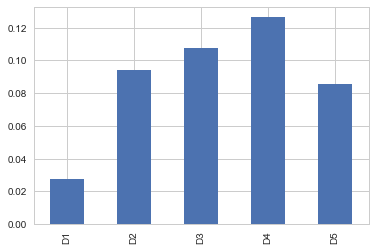

In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

#seaborn setting
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

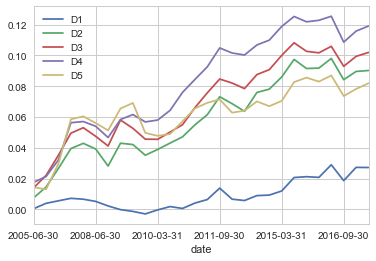

In [33]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

In [34]:
##분위별 수익률
sum_return = pd.DataFrame(weighted_portfolio5_df.groupby(['date','decile'])['weighted_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weighted_return
0,2005-06-30,D1,0.032937
1,2005-06-30,D2,0.022384
2,2005-06-30,D3,0.018492
3,2005-06-30,D4,0.019158
4,2005-06-30,D5,0.008521


In [35]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weighted_return'),columns=['D1','D2','D3','D4','D5'])
sum_return_T.head()

,D1,D2,D3,D4,D5
date,,,,,
2005-06-30,0.032937,0.022384,0.018492,0.019158,0.008521
2005-09-30,0.017514,0.005526,0.009509,0.001749,-0.004100
2006-03-31,0.013454,0.018469,0.016569,0.010900,0.013615
2006-06-30,0.007795,0.022485,0.020038,0.033444,0.025520
2008-03-31,-0.003296,0.012790,0.002244,0.000347,0.004606


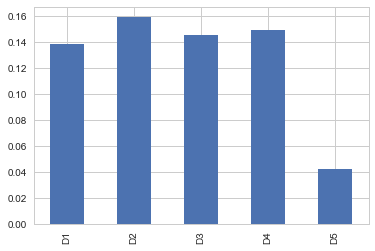

In [36]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

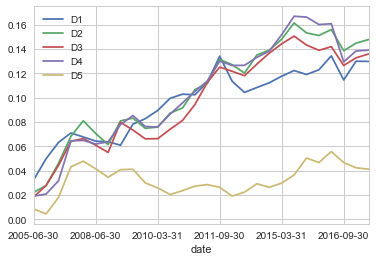

In [37]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

In [38]:
date_list = decile_df['date'].unique()
portfolio10_df = pd.DataFrame()
for date in date_list:
    temp = decile_df[decile_df['date']==date]
    D1 = temp.sort_values(by='E(y)').quantile(0.1)['E(y)']
    D2 = temp.sort_values(by='E(y)').quantile(0.2)['E(y)']
    D3 = temp.sort_values(by='E(y)').quantile(0.3)['E(y)']
    D4 = temp.sort_values(by='E(y)').quantile(0.4)['E(y)']
    D5 = temp.sort_values(by='E(y)').quantile(0.5)['E(y)']
    D6 = temp.sort_values(by='E(y)').quantile(0.6)['E(y)']
    D7 = temp.sort_values(by='E(y)').quantile(0.7)['E(y)']
    D8 = temp.sort_values(by='E(y)').quantile(0.8)['E(y)']
    D9 = temp.sort_values(by='E(y)').quantile(0.9)['E(y)']
    D10 = temp.sort_values(by='E(y)').quantile(1)['E(y)']
   
    
    temp.loc[temp['E(y)']<=D1,'decile'] = 'D1'
    temp.loc[(temp['E(y)']<=D2) & (temp['E(y)']>D1),'decile'] = 'D2'
    temp.loc[(temp['E(y)']<=D3) & (temp['E(y)']>D2),'decile'] = 'D3'
    temp.loc[(temp['E(y)']<=D4) & (temp['E(y)']>D3) ,'decile'] = 'D4'
    temp.loc[(temp['E(y)']<=D5) & (temp['E(y)']>D4) ,'decile'] = 'D5'
    temp.loc[(temp['E(y)']<=D6) & (temp['E(y)']>D5) ,'decile'] = 'D6'
    temp.loc[(temp['E(y)']<=D7) & (temp['E(y)']>D6) ,'decile'] = 'D7'
    temp.loc[(temp['E(y)']<=D8) & (temp['E(y)']>D7) ,'decile'] = 'D8'
    temp.loc[(temp['E(y)']<=D9) & (temp['E(y)']>D8) ,'decile'] = 'D9'
    temp.loc[(temp['E(y)']<=D10) & (temp['E(y)']>D9),'decile'] = 'D10'
    
    portfolio10_df = pd.concat([portfolio10_df,temp])

portfolio10_df.head()

,date,code,return,Y3,E(y),cap,decile
0,2015-06-30,A210540,0.00,NaN,0.000119,"114,282",D2
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,"388,749",D5
54,2015-06-30,A053210,-0.98,0.000051,0.000292,"968,395",D7
60,2015-06-30,A005500,6.12,0.000011,0.000149,"410,050",D3
62,2015-06-30,A007570,2.80,0.000027,0.000170,"1,379,724",D4


In [39]:
##시총가중
def formatting(x):
    if type(x) == 'float':
        return x
    else:
        return float(str(x).replace(',',''))
    
portfolio10_df['cap'] = portfolio10_df['cap'].apply(formatting)
weighted_portfolio10_df = portfolio10_df.copy()
weighted_portfolio10_df['weighted_cap'] = weighted_portfolio10_df.groupby(['date','decile'])['cap'].apply(lambda x: x/np.sum(x))
weighted_portfolio10_df['weighted_return'] = weighted_portfolio10_df['weighted_cap'] * weighted_portfolio10_df['return'] 
weighted_portfolio10_df.head()

,date,code,return,Y3,E(y),cap,decile,weighted_cap,weighted_return
0,2015-06-30,A210540,0.00,NaN,0.000119,114282.0,D2,0.016391,0.000000
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,388749.0,D5,0.014822,-0.038092
54,2015-06-30,A053210,-0.98,0.000051,0.000292,968395.0,D7,0.019312,-0.018926
60,2015-06-30,A005500,6.12,0.000011,0.000149,410050.0,D3,0.039723,0.243106
62,2015-06-30,A007570,2.80,0.000027,0.000170,1379724.0,D4,0.107425,0.300789


In [40]:
##동일가중
same_portfolio10_df = portfolio10_df.copy()
same_portfolio10_df['weight_return'] = portfolio10_df.groupby(['date','decile'])['return'].apply(lambda x: x/len(x))
same_portfolio10_df.head()

,date,code,return,Y3,E(y),cap,decile,weight_return
0,2015-06-30,A210540,0.00,NaN,0.000119,114282.0,D2,0.000000
27,2015-06-30,A000970,-2.57,-0.000006,0.000179,388749.0,D5,-0.048491
54,2015-06-30,A053210,-0.98,0.000051,0.000292,968395.0,D7,-0.018846
60,2015-06-30,A005500,6.12,0.000011,0.000149,410050.0,D3,0.115472
62,2015-06-30,A007570,2.80,0.000027,0.000170,1379724.0,D4,0.053846


In [41]:
##분위별 수익률
sum_return = pd.DataFrame(same_portfolio10_df.groupby(['date','decile'])['weight_return'].sum())
sum_return = sum_return/100
sum_return = sum_return.reset_index()
sum_return.head()

,date,decile,weight_return
0,2005-06-30,D1,0.001936
1,2005-06-30,D10,0.008077
2,2005-06-30,D2,0.000000
3,2005-06-30,D3,0.001665
4,2005-06-30,D4,0.013348


In [42]:
##portfolio performance
sum_return_T = pd.DataFrame(sum_return.pivot('date','decile','weight_return'))
sum_return_T['10'] = sum_return_T['D10']
sum_return_T = sum_return_T.drop('D10',axis=1)
sum_return_T.head()

decile,D1,D2,D3,D4,D5,D6,D7,D8,D9,10
date,,,,,,,,,,
2005-06-30,0.001936,0.000000,0.001665,0.013348,0.012443,0.015653,0.009088,0.026083,0.020740,0.008077
2005-09-30,0.003475,NaN,0.008867,0.005298,0.010136,0.006121,0.003175,0.004451,0.003130,-0.005723
2006-03-31,0.001753,-0.000680,0.010130,0.014350,0.011526,0.014991,0.009188,0.012519,0.017532,0.016291
2006-06-30,0.000964,0.008644,0.011762,0.014106,0.013692,0.015043,0.018004,0.030772,0.029375,0.028902
2008-03-31,0.000633,-0.002911,0.002453,0.004402,0.004947,0.002177,0.001360,0.000162,0.003485,0.000375


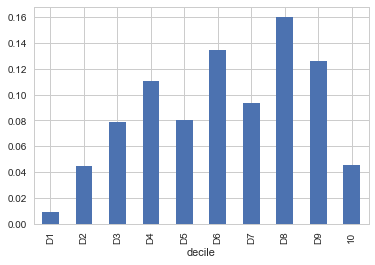

In [43]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

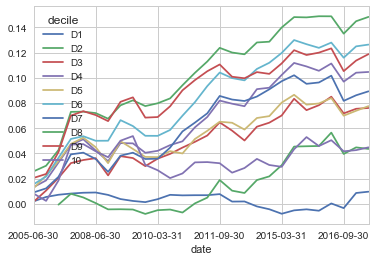

In [44]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '2002-09-30':
        cum_return_total.loc[index] = log_sum_return_T.loc['2002-09-30']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

# Panel analysis
: average slopes, R^2, Pearson between E(y) and y, rank correlations
- panel A : log(q)
- panel B : Cop
- panel C : dRoe
- panel D: all three variabls# 

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.datasets import make_regression
import time

In [73]:
##ols 함수
def ols_coef_X1(x):
    t_x = x[['const','X1']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_X2(x):
    t_x = x[['const','X2']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params

def ols_coef_X3(x):
    t_x = x[['const','X3']]
    t_y = x['Y']
    return sm.OLS(t_y,t_x).fit().params


##모든 종목에 대해 세로로 데이터프레임 쌓기
training_set = pd.DataFrame()
input_list = ['Y','X1','X2','X3']
for col in stock_code[:-1]:
    try:
        temp = pd.concat([Y[col],X1[col],X2[col],X3[col]],axis =1)
        temp.columns = input_list
        temp['const'] = 1
        training_set = pd.concat([training_set,temp])
    except:
        print(col)
        
###training_set 에 weighted_equity 곱해주기 code 명 추가
new_set= pd.DataFrame()
column = weighted_equity.columns
column_list = []
for date in date_list:
    temp = pd.DataFrame()
    for col in input_list:
        temp[col] = (training_set.loc[date][col] * weighted_equity.loc[date].values)
    column_list.append(column)
    new_set = pd.concat([new_set,temp])
new_set['const']=1
empty =[]
for i, a in enumerate(column_list):
    empty.extend(column_list[i])
new_set['code'] = empty

##index formatting
new_set = new_set.reset_index()
new_set['index']=pd.to_datetime(new_set['index'],format ='%Y-%m-%d')
new_set['index'] = new_set['index'].apply(lambda x: str(x).split(' ')[0])

##winsorizing
new_set = new_set.set_index('index')
training_set = new_set.drop('code',axis=1)

ols_df = pd.DataFrame() #<--ols 에 사용되는 최종 winsorizied Dataframe 
for date in date_list:
    data = training_set.loc[date]
    data = pd.DataFrame(np.where(data <=data.quantile(0.01),data.quantile(0.01),data),index = data.index,columns= data.columns)
    data = pd.DataFrame(np.where(data >=data.quantile(0.99),data.quantile(0.99),data),index = data.index,columns= data.columns)
    ols_df = pd.concat([ols_df,data])

##날짜별로 ols 돌리기 = cross_section regression
ols_df = ols_df.reset_index().dropna()  #dropna 를 해줘야하나?
#ols_df.to_csv('investtoasset_growth_ols_df.csv')

gamma_X1 = ols_df.groupby('index').apply(ols_coef_X1)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
gamma_X1['상수'] = gamma_X1['const']
gamma_X1 = gamma_X1.drop('const',axis=1)
gamma_X1.columns = ['X1','const']
gamma_X1.to_csv('Y3_log(q)_beta.csv')
gamma_X1.head()

,X1,const
index,,
2002-03-31,0.017078,0.000086
2002-06-30,0.017218,0.000085
2002-09-30,0.017609,0.000029
2002-12-31,0.017602,0.000033
2003-03-31,0.011078,0.000041


In [80]:
gamma_X2 = ols_df.groupby('index').apply(ols_coef_X2)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
gamma_X2['상수'] = gamma_X2['const']
gamma_X2 = gamma_X2.drop('const',axis=1)
gamma_X2.columns = ['X2','const']
#gamma_X2.to_csv('Y3_Cop_beta.csv')
gamma_X2.head()

,X2,const
index,,
2002-03-31,4.552687,0.000137
2002-06-30,4.557233,0.000134
2002-09-30,4.635827,0.000081
2002-12-31,4.612150,0.000090
2003-03-31,2.481080,0.000076


In [87]:
gamma_X3 = ols_df.groupby('index').apply(ols_coef_X3)  ##dropna 하고 하나의 타임프레인 길이가 몇개 이하인건 돌리지 않는거에 대한 이슈!
gamma_X3['상수'] = gamma_X3['const']
gamma_X3 = gamma_X3.drop('const',axis=1)
gamma_X3.columns = ['X3','const']
#gamma_X3.to_csv('Y3_dRoe_beta.csv')
gamma_X3.head()

,X3,const
index,,
2002-03-31,133352.800491,0.000573
2002-06-30,223268.138498,0.000564
2002-09-30,254048.164706,0.000514
2002-12-31,271346.251290,0.000519
2003-03-31,-258172.868417,0.000328
